In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, nltk, warnings
import matplotlib.cm as cm
import itertools
from pathlib import Path

plt.style.use('seaborn-whitegrid')
# sns.set_palette("pastel")
# import warnings
# warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Wholesale customers data.csv')
df

Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen  
0          1338  
1          1776  
2          7844  
3          1788  
4          5185  
..          ...  
435        2204  
436        2346  
437        1867  
438        2125  
439          52  

[440 rows x 8 columns]

In [3]:
df = df.rename(columns={'Delicassen': 'Delicatessen'})
df['Channel'] = df['Channel'].map({1:'HoReCa', 2: 'Retail'})
df['Region'] = df['Region'].map({1:'Lisbon', 2: 'Porto',3:'Other'})
df

Channel Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0    Retail  Other  12669   9656     7561     214              2674   
1    Retail  Other   7057   9810     9568    1762              3293   
2    Retail  Other   6353   8808     7684    2405              3516   
3    HoReCa  Other  13265   1196     4221    6404               507   
4    Retail  Other  22615   5410     7198    3915              1777   
..      ...    ...    ...    ...      ...     ...               ...   
435  HoReCa  Other  29703  12051    16027   13135               182   
436  HoReCa  Other  39228   1431      764    4510                93   
437  Retail  Other  14531  15488    30243     437             14841   
438  HoReCa  Other  10290   1981     2232    1038               168   
439  HoReCa  Other   2787   1698     2510      65               477   

     Delicatessen  
0            1338  
1            1776  
2            7844  
3            1788  
4            5185  
..            ...  
435          2204  
436          2346  
437          1867  
438          2125  
439            52  

[440 rows x 8 columns]

In [4]:
df.columns.tolist()

['Channel',
 'Region',
 'Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicatessen']

In [5]:
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Channel           440 non-null    object
 1   Region            440 non-null    object
 2   Fresh             440 non-null    int64 
 3   Milk              440 non-null    int64 
 4   Grocery           440 non-null    int64 
 5   Frozen            440 non-null    int64 
 6   Detergents_Paper  440 non-null    int64 
 7   Delicatessen      440 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 27.6+ KB
None


Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

In [6]:
df.to_csv("wholesale-processed.csv")

# EDA

In [7]:
continuous = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']
categorical = ['Channel','Region']
print(str(continuous) + '\n length: ' + str(len(continuous)))
print(str(categorical) + '\n length: ' + str(len(categorical)))

['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']
 length: 6
['Channel', 'Region']
 length: 2


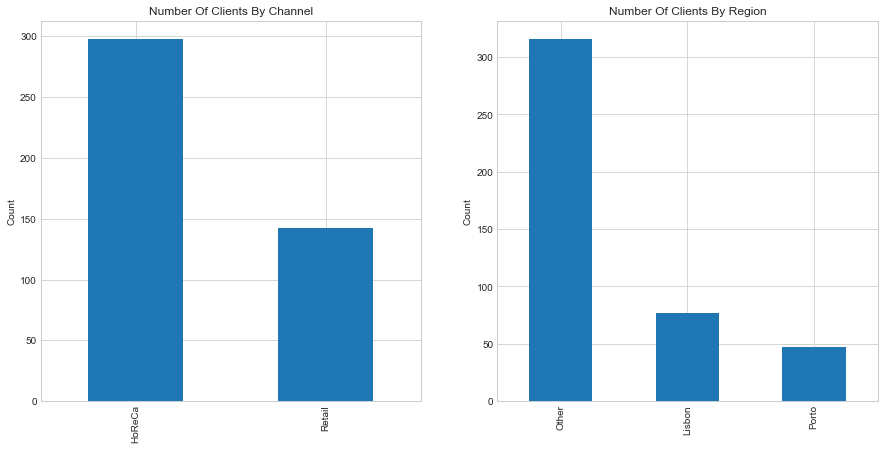

In [8]:
f,ax=plt.subplots(1,2,figsize=(15,7))
df['Channel'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number Of Clients By Channel')
ax[0].set_ylabel('Count')
df['Region'].value_counts().plot.bar(ax=ax[1])
ax[1].set_title('Number Of Clients By Region')
ax[1].set_ylabel('Count')
plt.show()

In [9]:
count = df.groupby(["Region","Channel"])["Channel"].count().unstack()
count.style.background_gradient(cmap='viridis')

<AxesSubplot:xlabel='Region', ylabel='count'>

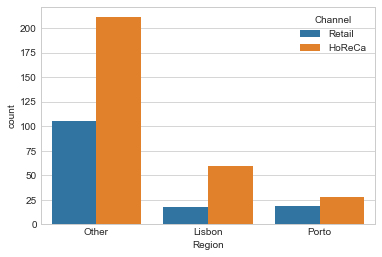

In [10]:
sns.countplot(x='Region',hue='Channel',data=df)

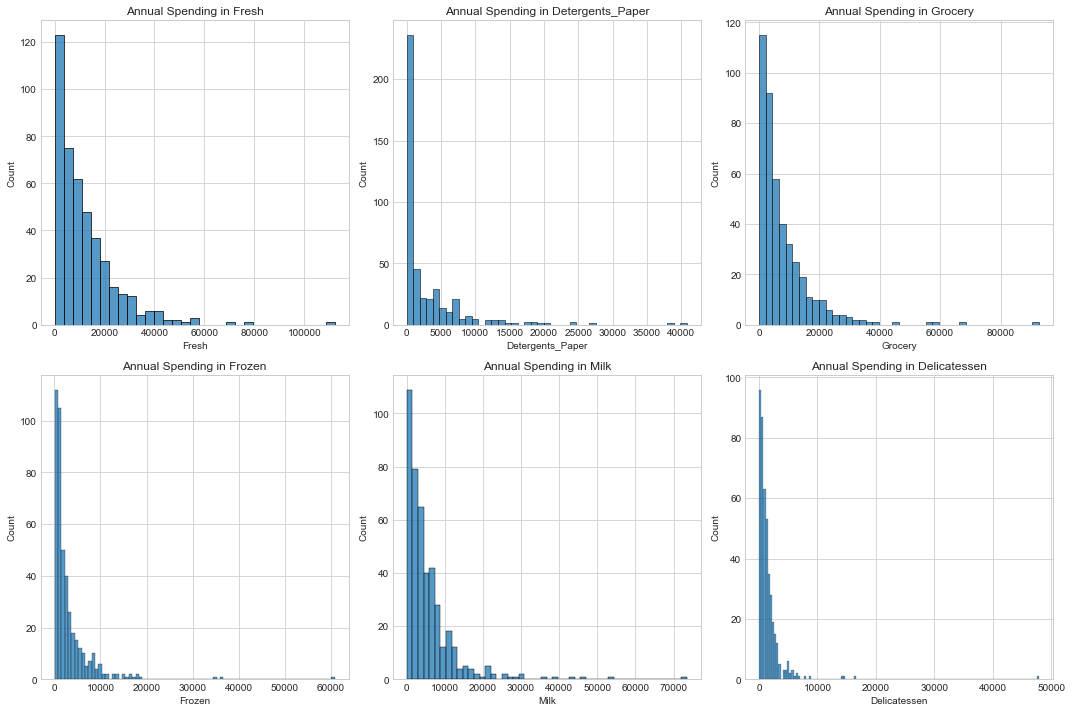

In [11]:
f,ax = plt.subplots(2,3,figsize=(15,10))

for i,fea in enumerate(continuous):
    r,c = i%2,i%3
    sns.histplot(df[fea],ax=ax[r,c])
    ax[r,c].set_title('Annual Spending in {}'.format(fea))
    
plt.tight_layout()
plt.show()

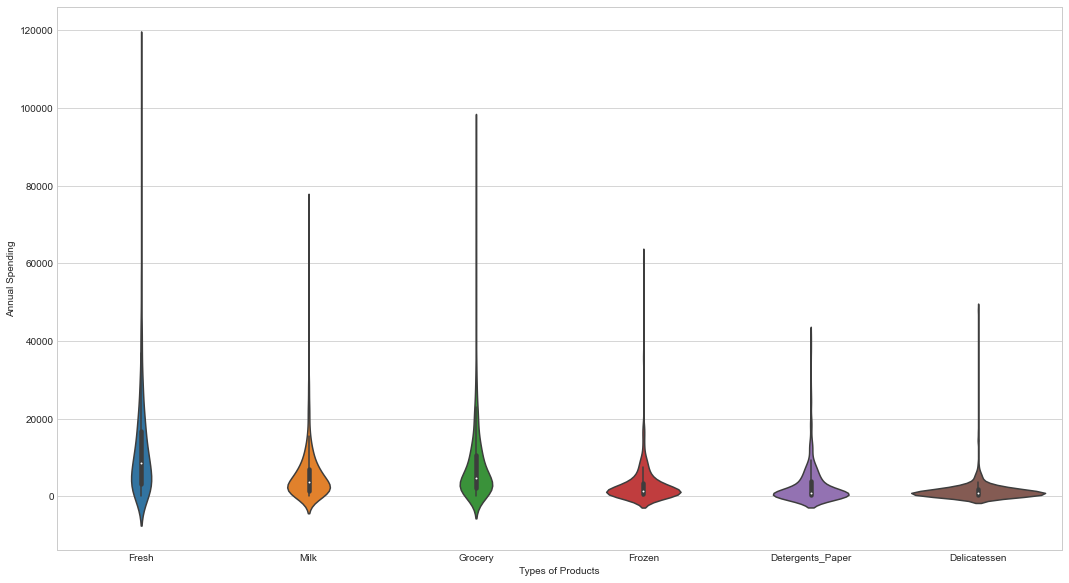

In [12]:
melted = df[continuous].melt(var_name='Types of Products', value_name='Annual Spending')
plt.figure(figsize=(18, 10))
ax = sns.violinplot(x='Types of Products', y='Annual Spending', data=melted)
# _ = ax.set_xticklabels(df[continuous].keys(), rotation=90)

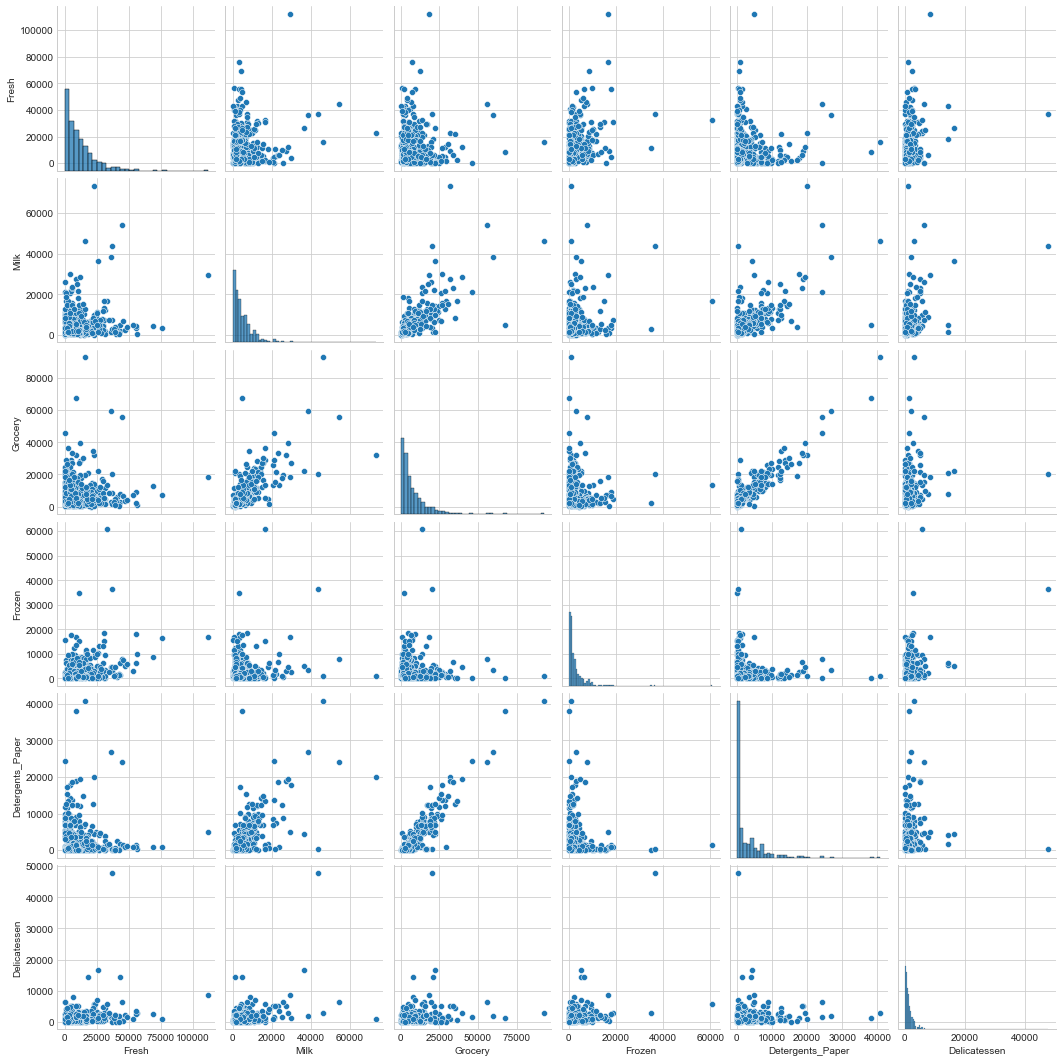

In [13]:
sns.pairplot(df[continuous])

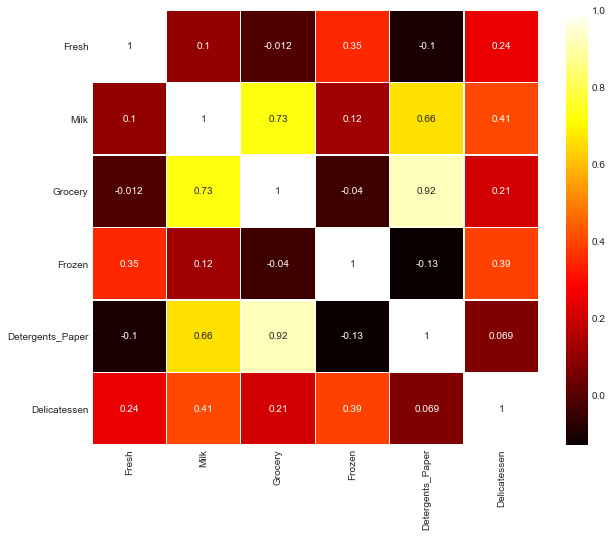

In [14]:
sns.heatmap(df[continuous].corr(),cmap = 'hot', annot=True,linewidths=0.2) 
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

# PCA

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# scaling
df_scaled = df[continuous].to_numpy()
df.shape

(440, 8)

In [16]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_scaled)
df_scaled

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

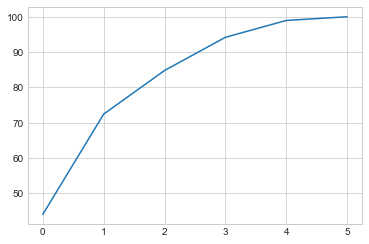

In [17]:
pca = PCA(n_components = 6)
pca.fit(df_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_*100))

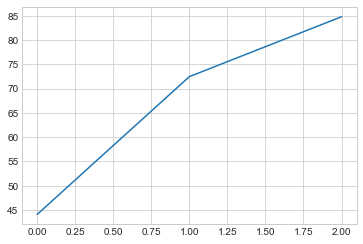

In [18]:
pca = PCA(n_components = 3)
res_pca = pca.fit_transform(df_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_*100))

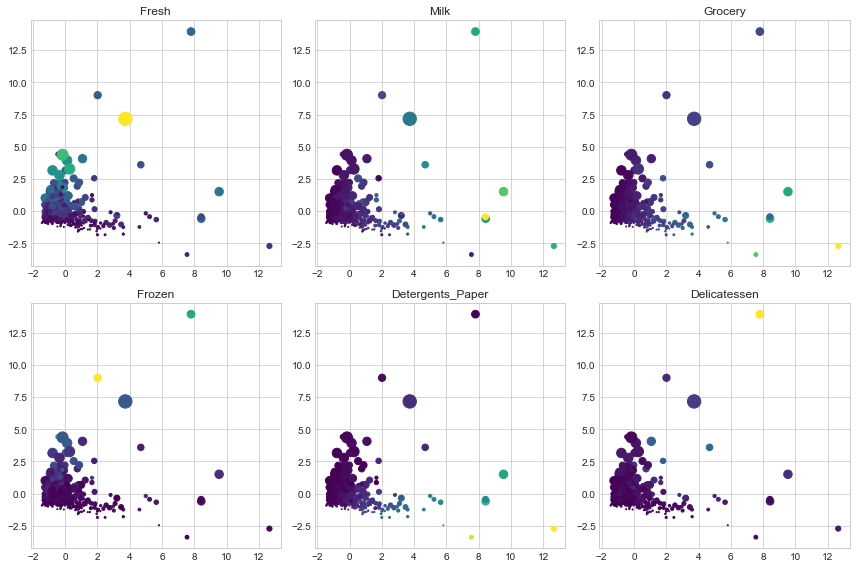

In [19]:
fig,axes = plt.subplots(2,3,figsize = (12,8))
const = 20

for fea,ax in zip(continuous,axes.ravel()):
    sizes = const + const * df_scaled[:,fea.index(fea)]
    cols = df[fea]
    ax.scatter(res_pca[:,0],res_pca[:,1],s=sizes, c=cols, cmap = 'viridis')
    ax.set_title(fea)
    
plt.tight_layout()

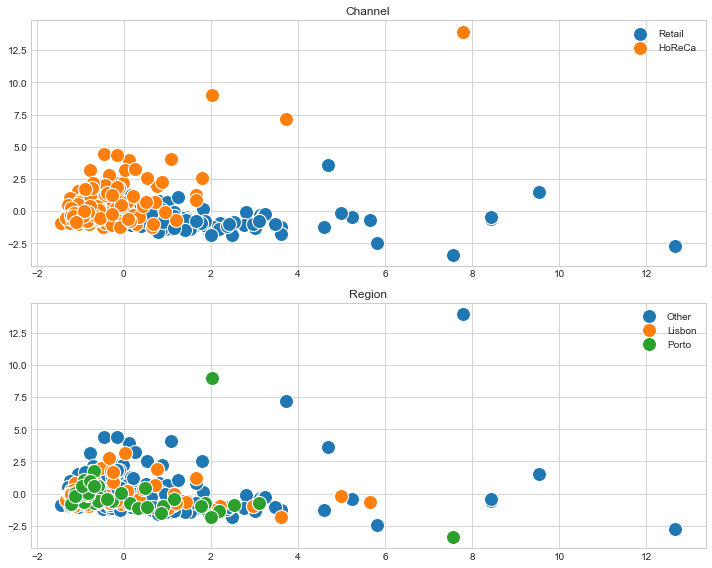

In [20]:
fig,axes = plt.subplots(2,1, figsize = (10,8))
const = 200

for feature,ax in zip(categorical,axes.ravel()):
    for unique_val in df[feature].unique():
        sns.scatterplot(x=res_pca[df[feature] == unique_val,0],
                        y=res_pca[df[feature] == unique_val,1],
                       label=unique_val,s=const, ax=ax)
        ax.set_title(feature)
        
plt.tight_layout()

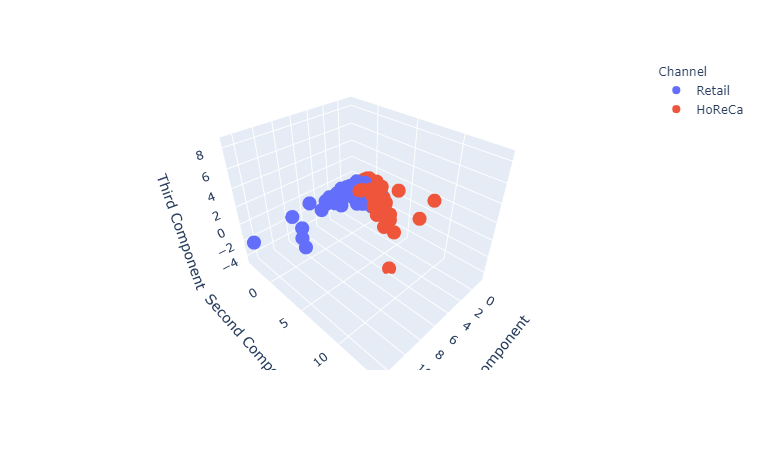

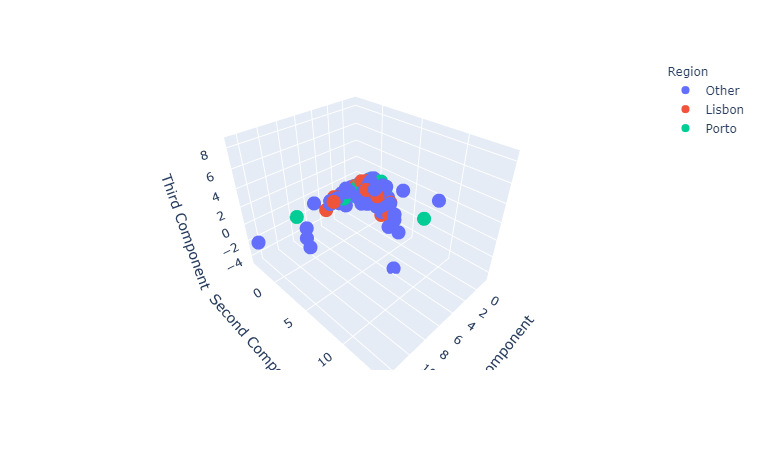

In [21]:
import plotly.express as px

for feature,ax in zip(categorical,axes.ravel()):
    sizes = const
    temp = pd.concat([pd.DataFrame(res_pca,columns= ['First component','Second Component','Third Component']),
                        df[feature]], axis=1)
    fig = px.scatter_3d(temp, x='First component',
                        y='Second Component',
                        z='Third Component',
                       color = temp[feature])
    fig.show()
# x
# fig = (res_pca, x='sepal_length', y='sepal_width', z='petal_width',
#               color='species')
# fig.show()

# KPCA

In [22]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=3,kernel='rbf')
res_kpca = kpca.fit_transform(df_scaled)

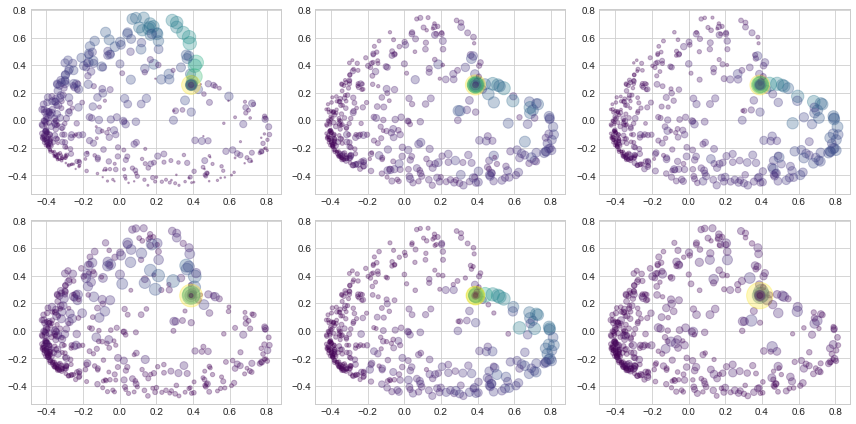

In [23]:
fig,axes = plt.subplots(2,3,figsize=(12,6))
const = 40

for feature,ax in zip(continuous,axes.ravel()):
    sizes = const + const * df_scaled[:,continuous.index(feature)]
    ax.scatter(res_kpca[:,0],res_kpca[:,1],
               s=sizes,alpha=0.3, c = df[feature],cmap='viridis')
    
plt.tight_layout()

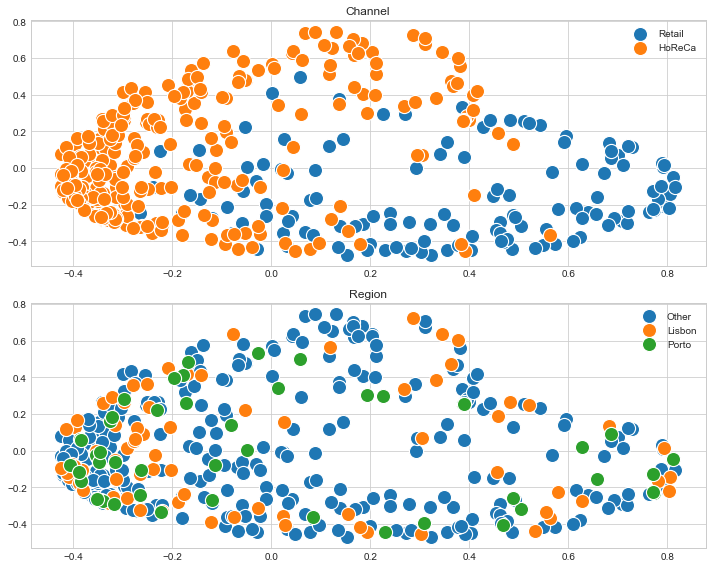

In [24]:
fig,axes = plt.subplots(2,1, figsize = (10,8))
const = 200

for feature,ax in zip(categorical,axes.ravel()):
    for unique_val in df[feature].unique():
        sns.scatterplot(x=res_kpca[df[feature] == unique_val,0],
                        y=res_kpca[df[feature] == unique_val,1],
                       label=unique_val,s=const, ax=ax)
        ax.set_title(feature)
        
plt.tight_layout()

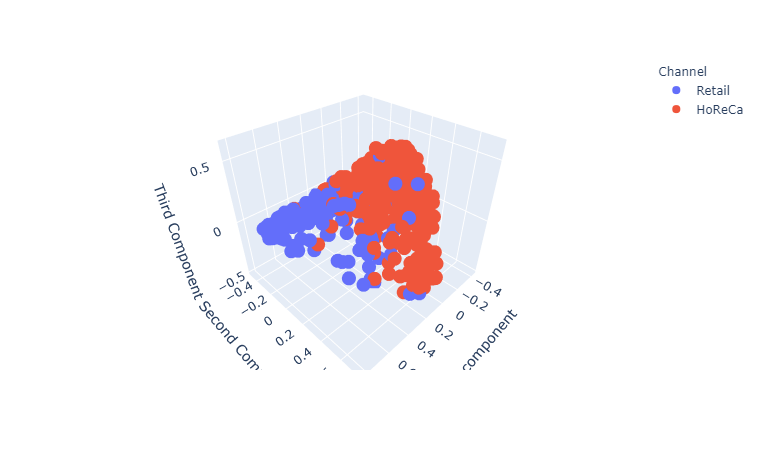

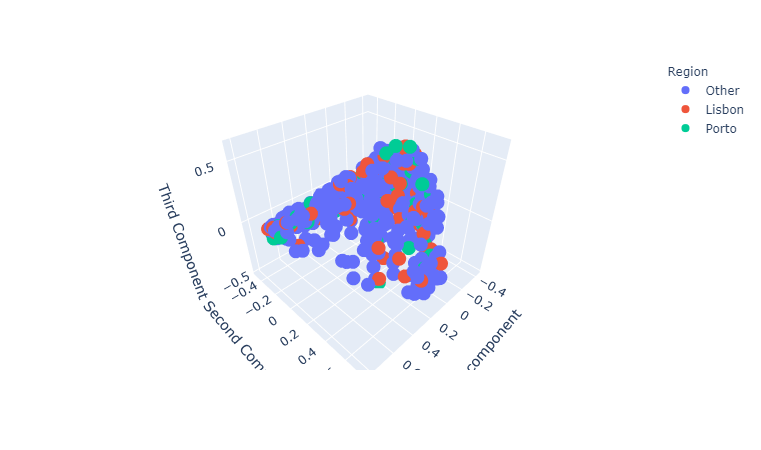

In [25]:
import plotly.express as px

for feature,ax in zip(categorical,axes.ravel()):
    sizes = 200
    temp = pd.concat([pd.DataFrame(res_kpca,columns= ['First component','Second Component',
                                                     'Third Component']),
                        df[feature]], axis=1)
    fig = px.scatter_3d(temp, x='First component',
                        y='Second Component',
                        z='Third Component',
                       color = temp[feature])
    fig.show()

In [26]:
df['kpca_1'],df['kpca_2'],df['kpca_3'] = res_kpca[:,0],res_kpca[:,1],res_kpca[:,2]
df['pca_1'],df['pca_2'],df['pca_3'] = res_pca[:,0],res_pca[:,1],res_pca[:,2]

In [27]:
df.to_csv('wholesale-latent.csv')